In [1]:
# needed packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import PolynomialFeatures

# Author: Łukasz Tenerowicz
## Short introduction to dataset
All the data included below shows the correlation between factors like alcohol, free time, go out with friends, grades etc. in students' lifes in two Portuguese schools - Gabriel Pereira (GP) and Mousinho da Silveira (MS). Two datasets are provided regarding the performance in two distinct subjects: Math and Portuguese. In this analysis I will be focused only on math dataset. More specific details could be found [here](https://www.kaggle.com/datasets/whenamancodes/alcohol-effects-on-study).\
Below I show meaning and description of all data attributes.

In [2]:
math = pd.read_csv('Maths.csv')
math.head()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,4,3,4,1,1,3,6,5,6,6
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,5,3,3,1,1,3,4,5,5,6
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,4,3,2,2,3,3,10,7,8,10
3,GP,F,15,U,GT3,T,4,2,health,services,...,3,2,2,1,1,5,2,15,14,15
4,GP,F,16,U,GT3,T,3,3,other,other,...,4,3,2,1,2,5,4,6,10,10


## Data summary
Below we can see all dataset's attributes has 395 rows. Additionally we can say all the data is not corrupted - it seems to be meaningful.

In [3]:
math.describe()

,age,Medu,Fedu,traveltime,studytime,failures,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
count,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000
mean,16.696203,2.749367,2.521519,1.448101,2.035443,0.334177,3.944304,3.235443,3.108861,1.481013,2.291139,3.554430,5.708861,10.908861,10.713924,10.415190
std,1.276043,1.094735,1.088201,0.697505,0.839240,0.743651,0.896659,0.998862,1.113278,0.890741,1.287897,1.390303,8.003096,3.319195,3.761505,4.581443
min,15.000000,0.000000,0.000000,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,3.000000,0.000000,0.000000
25%,16.000000,2.000000,2.000000,1.000000,1.000000,0.000000,4.000000,3.000000,2.000000,1.000000,1.000000,3.000000,0.000000,8.000000,9.000000,8.000000
50%,17.000000,3.000000,2.000000,1.000000,2.000000,0.000000,4.000000,3.000000,3.000000,1.000000,2.000000,4.000000,4.000000,11.000000,11.000000,11.000000
75%,18.000000,4.000000,3.000000,2.000000,2.000000,0.000000,5.000000,4.000000,4.000000,2.000000,3.000000,5.000000,8.000000,13.000000,13.000000,14.000000
max,22.000000,4.000000,4.000000,4.000000,4.000000,3.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,75.000000,19.000000,19.000000,20.000000


In [4]:
print('Null values: ')
math.isna().sum().to_frame()

Null values: 


,0
school,0
sex,0
age,0
address,0
famsize,0
Pstatus,0
Medu,0
Fedu,0
Mjob,0
Fjob,0


There is not any missing values. Now we can directly work on this data without concerning about null values.

## Basic exploration

Text(0.5, 1.0, 'Age distribution')

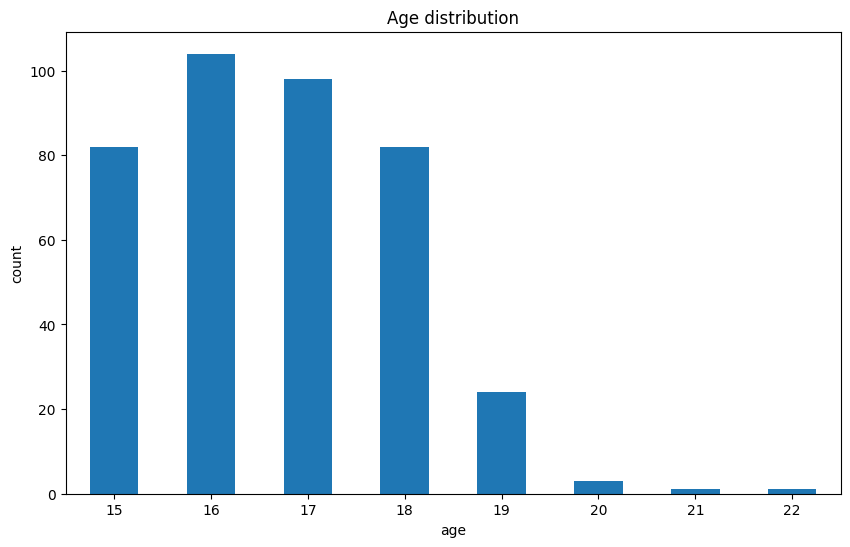

In [5]:
count = math['age'].value_counts().sort_index()

plt.figure(figsize=(10,6))
count.plot.bar(rot=0, xlabel='age', ylabel='count')
plt.title('Age distribution')


F    208
M    187
Name: sex, dtype: int64


<AxesSubplot: ylabel='count'>

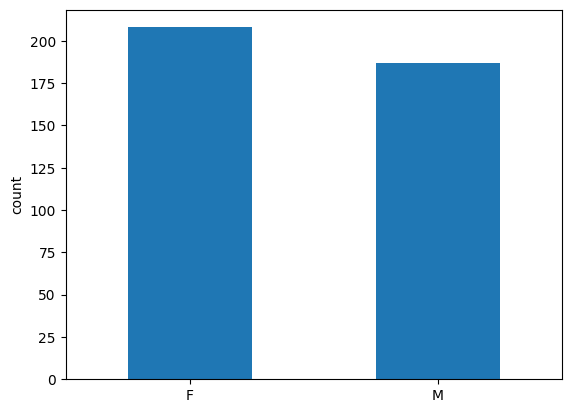

In [6]:
sex = math['sex'].value_counts()
print(sex)
sex.plot.bar(rot=0, ylabel='count')
# F - female
# M - male

Above plot shows us basic data about students. The most of students' age is distributed in range from 15 to 18. Additionally we know that there are more men than women. Now lets check how students' grade are correlated with their daily alcohol comsumption.

Text(0, 0.5, 'final grade (G3)')

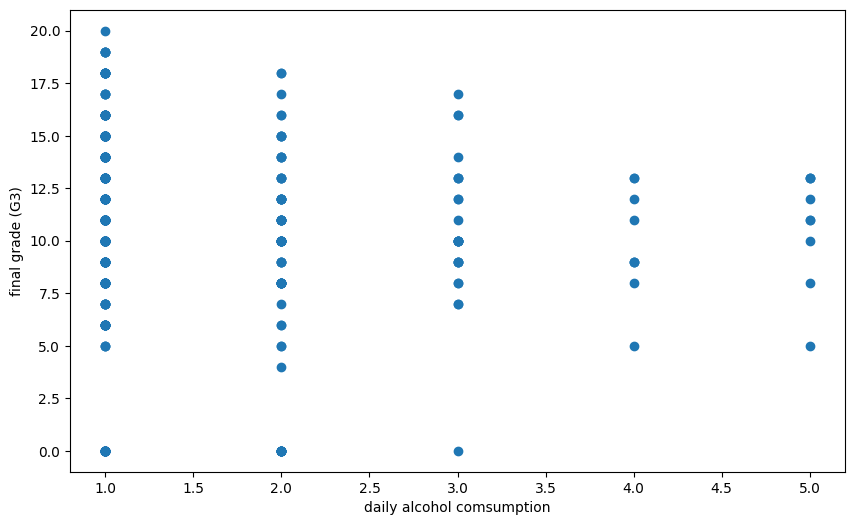

In [7]:
plt.figure(figsize=(10, 6))
plt.scatter(math['Dalc'], math['G3'])

plt.xlabel('daily alcohol comsumption')
plt.ylabel('final grade (G3)')

This plot shows us that correlation between daily alcohol comsumption and final grade is weak. Despite of the fact that people with grade equal 20 have the smallest daily alcohol comsumption we can find people with the biggest alcohol comsumption who have better grades than people with alcohol comsumption equal 1.

<AxesSubplot: title={'center': 'G3'}, xlabel='[Dalc]'>

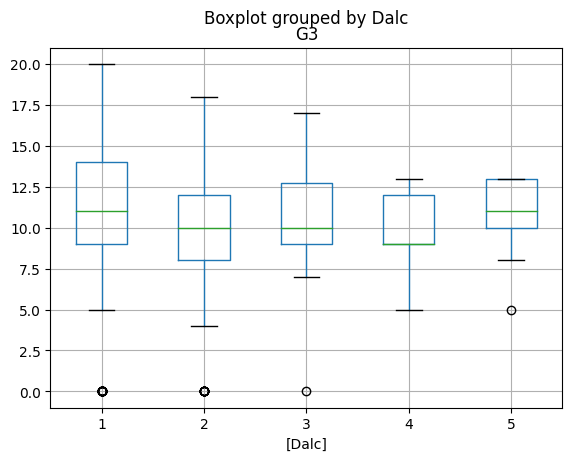

In [8]:
math.boxplot(column=['G3'], by=['Dalc'])

The same data but with boxplot.

Now lets take a look at correlation between period grades (G1, G2) and final grade (G3).

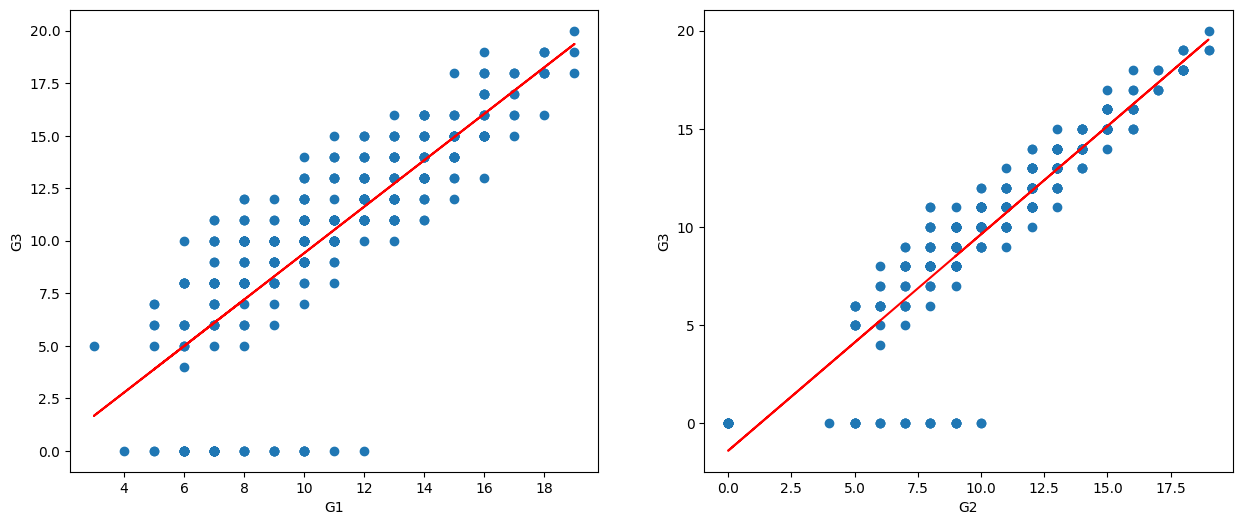

In [11]:
# plot 1 (G1, G3)
X = math['G1'].values.reshape(-1, 1)[:1000]
y = math['G3'].values.reshape(-1)[:1000]
model = LinearRegression()
model.fit(X, y)
pred = model.predict(X)
plt.ylabel = 'G3'

plt.figure(figsize=(15, 6))
ax = plt.subplot(121)
ax.set_xlabel('G1')
ax.set_ylabel('G3')

plt.scatter(X, y)
plt.plot(X, pred, c='red')

# plot 2 (G2, G3)
X = math['G2'].values.reshape(-1, 1)[:1000]
model = LinearRegression()
model.fit(X, y)
pred = model.predict(X)

plt.xlabel = 'G2'
ax = plt.subplot(122)
ax.set_xlabel('G2')
ax.set_ylabel('G3')

plt.scatter(X, y)
plt.plot(X, pred, c='red')


As expected, G1 and G2 are strongly (linearly) correlated with final grade G3, because G3 consists of G1 and G2.

Besides students, there is interesting fact about their parents' education. Seemingly marriages with the same or similar level education represent a majority of all marriages.

All marriages: 395
Marriage count, where husband and wife have the same education: 196
Marriage count, where husband has one level lower education than wife: 51
Marriage count, where husband has one level higher education than wife: 97
Marriages with the same or one level different education represent 87.09% of all marriages.


<BarContainer object of 1 artists>

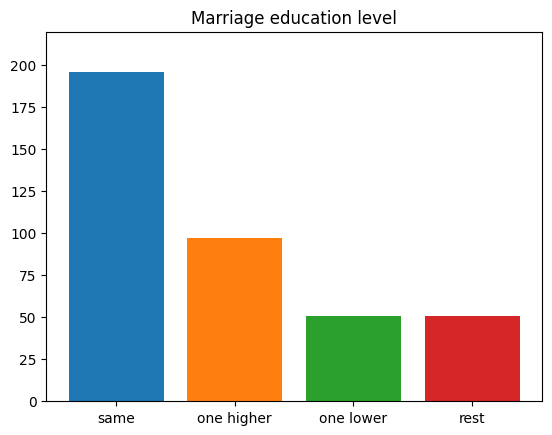

In [12]:
edu = math[['Medu', 'Fedu']]

all_marriages = edu['Fedu'].count()
same = (edu['Medu'] == edu['Fedu']).value_counts()[True]
one_lower = (edu['Medu'] == edu['Fedu'] - 1).value_counts()[True]
one_higher = (edu['Medu'] == edu['Fedu'] + 1).value_counts()[True]
rest = all_marriages - same - one_higher - one_lower

print(f'All marriages: {all_marriages}')
print(f'Marriage count, where husband and wife have the same education: {same}')
print(f'Marriage count, where husband has one level lower education than wife: {one_lower}')
print(f'Marriage count, where husband has one level higher education than wife: {one_higher}')

percent = (same + one_higher + one_lower) / all_marriages * 100
print(f'Marriages with the same or one level different education represent {round(percent, 2)}% of all marriages.')

fig, ax = plt.subplots(1)
ax.set_ylim(0, 220)
ax.set_title('Marriage education level')
plt.bar('same', same, width=0.8)
plt.bar('one higher', one_higher, width=0.8)
plt.bar('one lower', one_lower, width=0.8)
plt.bar('rest', rest, width=0.8)